### Testing another dataset
https://www.kaggle.com/datasets/saurabhshahane/fake-news-classification

In [21]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split


In [10]:
df = pd.read_csv('WELFake_Dataset.csv')

# Check number of NaN values
print("Number of NaN values in text column:", df['text'].isna().sum())

# Remove rows with NaN values
df = df.dropna(subset=['text'])

# Convert text column to string type to ensure compatibility
df['text'] = df['text'].astype(str)

print("Shape of dataset after cleaning:", df.shape)

Number of NaN values in text column: 39
Shape of dataset after cleaning: (72095, 4)


In [ ]:
train, test = train_test_split(df, test_size=0.2, random_state=42)

(57676,)

In [30]:
v = TfidfVectorizer()
train_X = v.fit_transform(train['text'])
train_y = train['label'].to_numpy()
test_X = v.transform(test['text'])
test_y = test['label'].to_numpy()

In [ ]:
clf = LogisticRegression(max_iter=200)
clf.fit(train_X, train_y)
y_pred = clf.predict(test_X)
test_accuracy = accuracy_score(test_y, y_pred)
print(f"Tsst accuracy: {test_accuracy:.2f}")
print(classification_report(test_y, y_pred))


Accuracy: 0.94
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      7010
           1       0.94      0.95      0.95      7409

    accuracy                           0.94     14419
   macro avg       0.94      0.94      0.94     14419
weighted avg       0.94      0.94      0.94     14419



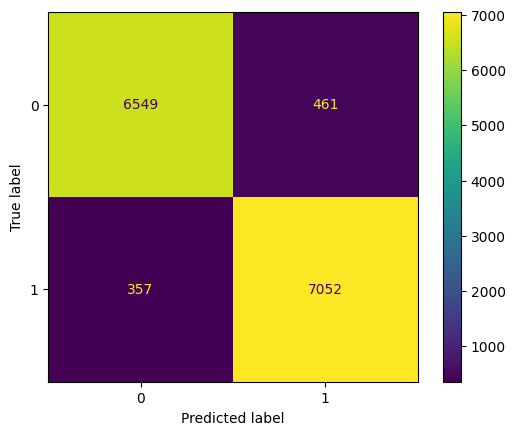

In [32]:
import matplotlib.pyplot as plt

conf_mat = metrics.confusion_matrix(test_y, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = [0, 1])

cm_display.plot()
plt.show()
